In [33]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import xarray as xr
pylab.rcParams['figure.figsize'] = (16., 9.)
#%matplotlib inline

In [4]:
omega = xr.open_dataset('/users/global/cornkle/figs/CLOVER/CP4testfiles/omega_pl/omega_pl_A3hr_inst_ah261_4km_200205110300-200205120000.nc')
rain = xr.open_dataset('/users/global/cornkle/figs/CLOVER/CP4testfiles/lsRain/lsRain_A1hr_mean_ah261_4km_200205110030-200205112330.nc')

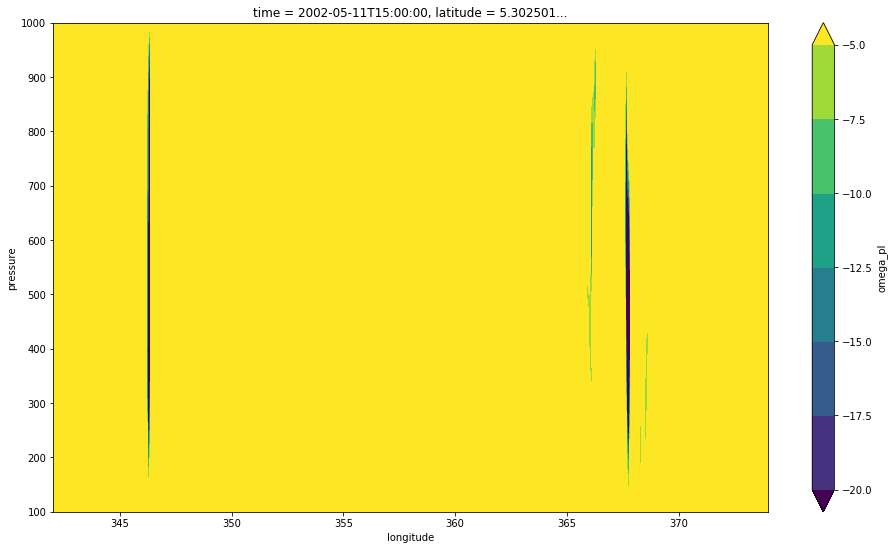

In [70]:
omega['omega_pl'][4,:,44,:].plot.contourf(vmin=-20, vmax=-5)

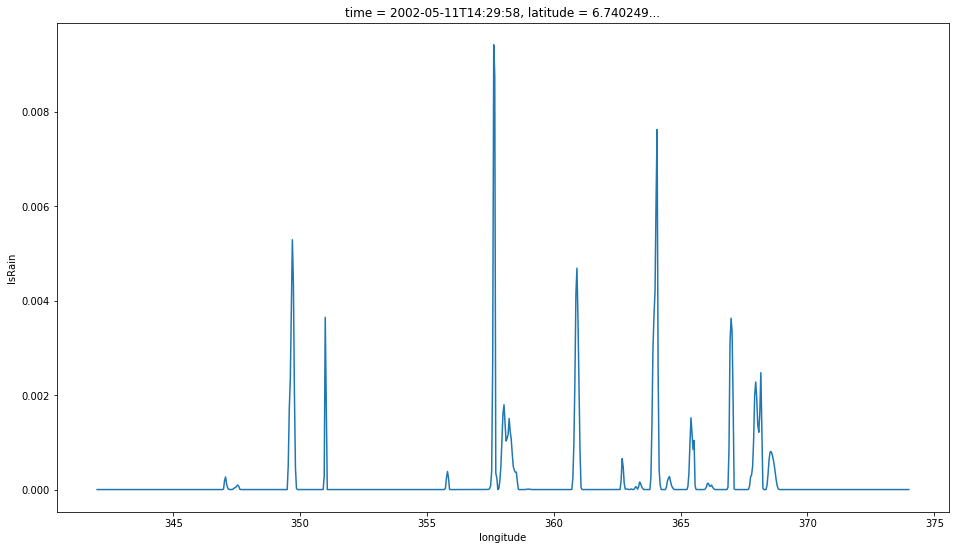

In [37]:
rain['lsRain'][14,80,:].plot.line()

In [13]:
omega.pressure

<xarray.DataArray 'pressure' (pressure: 18)>
array([  100.,   200.,   300.,   350.,   400.,   450.,   500.,   550.,   600.,
         650.,   700.,   750.,   800.,   850.,   900.,   925.,   950.,  1000.], dtype=float32)
Coordinates:
  * pressure                 (pressure) float32 100.0 200.0 300.0 350.0 ...
    forecast_reference_time  datetime64[ns] 1997-07-01
Attributes:
    axis:       Z
    units:      hPa
    long_name:  pressure

In [75]:
rainplot =  rain['lsRain'][15,44,:]*3600
omplot = omega['omega_pl'][4,2,44,:]

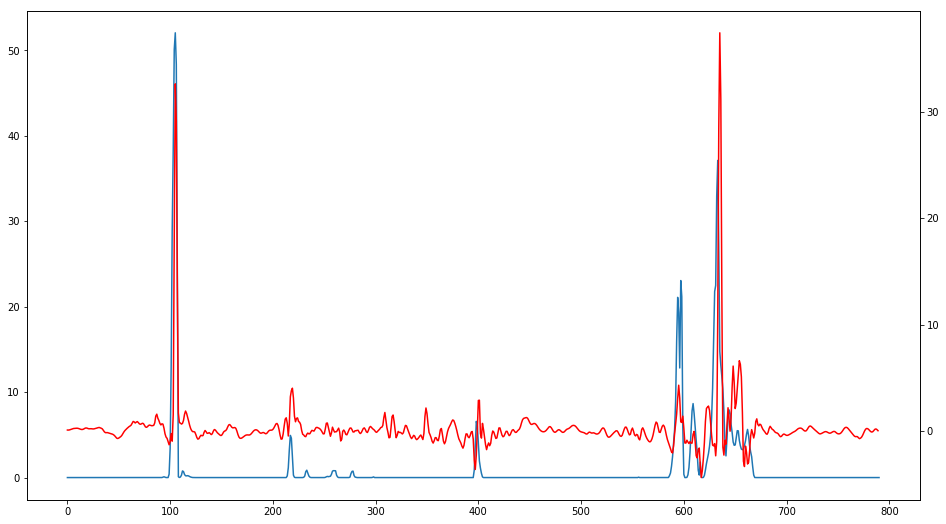

In [80]:
f=plt.figure()
ax = f.add_subplot(111)
ax.plot(rainplot)
ax1 = ax.twinx()
ax1.plot(omplot*-1, color='r')

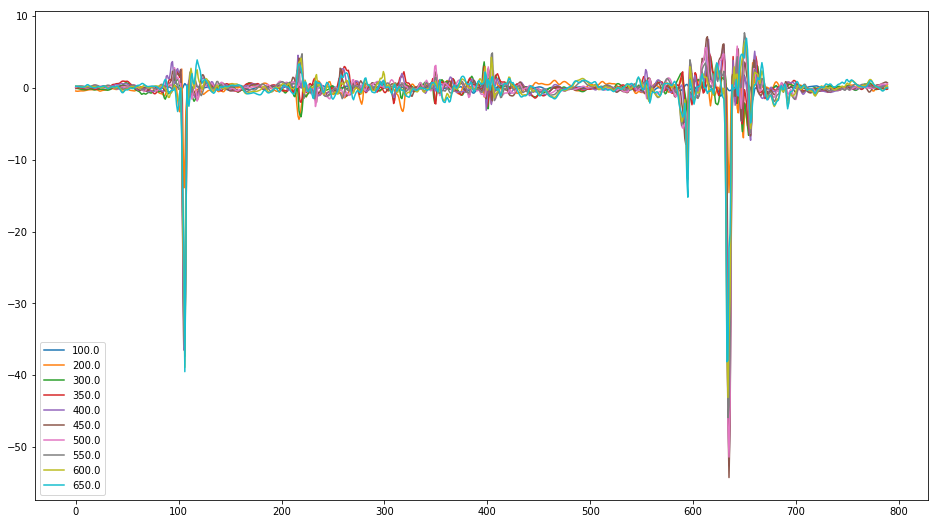

In [67]:
plt.figure()
for l in range(10):
    lab = omega.pressure.values[l]
    plt.plot(omega['omega_pl'][4,l,44,:], label=str(lab))
    
plt.legend()    
plt.show()